In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!python -m pip install -r requirements_py3.8.txt

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached pycodestyle-2.9.1-py2.py3-none-any.whl (41 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\acces\\Anaconda3\\Lib\\site-packages\\~hap\\_cext.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached astroid-2.6.6-py3-none-any.whl (231 kB)
  Attempting uninstall: pycodestyle
    Found existing installation: pycodestyle 2.6.0
    Uninstalling pycodestyle-2.6.0:
      Successfully uninstalled pycodestyle-2.6.0
  Attempting uninstall: astroid
    Found existing installation: astroid 2.5
    Uninstalling astroid-2.5:
      Successfully uninstalled astroid-2.5
  Attempting uninstall: shap
    Found existing installation: shap 0.41.0
    Uninstalling shap-0.41.0:
      Successfully uninstalled shap-0.41.0


In [3]:
df = pd.read_csv(r"./data/bank_data.csv")
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.shape

(10127, 21)

In [7]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [13]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

quant_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt',
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

In [15]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


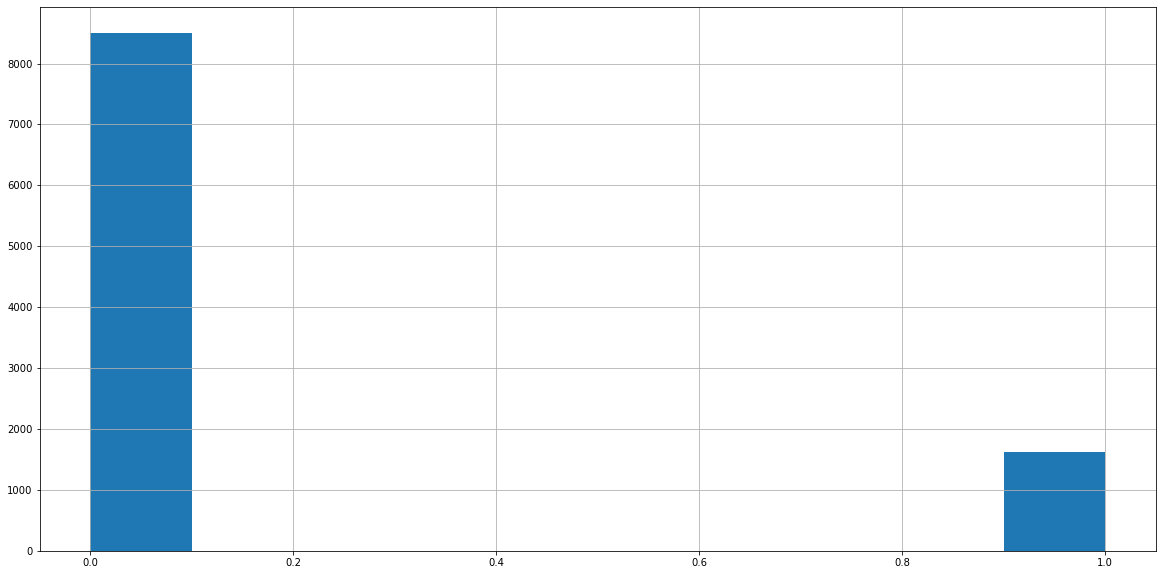

In [16]:
plt.figure(figsize=(20,10)) 
df['Churn'].hist();

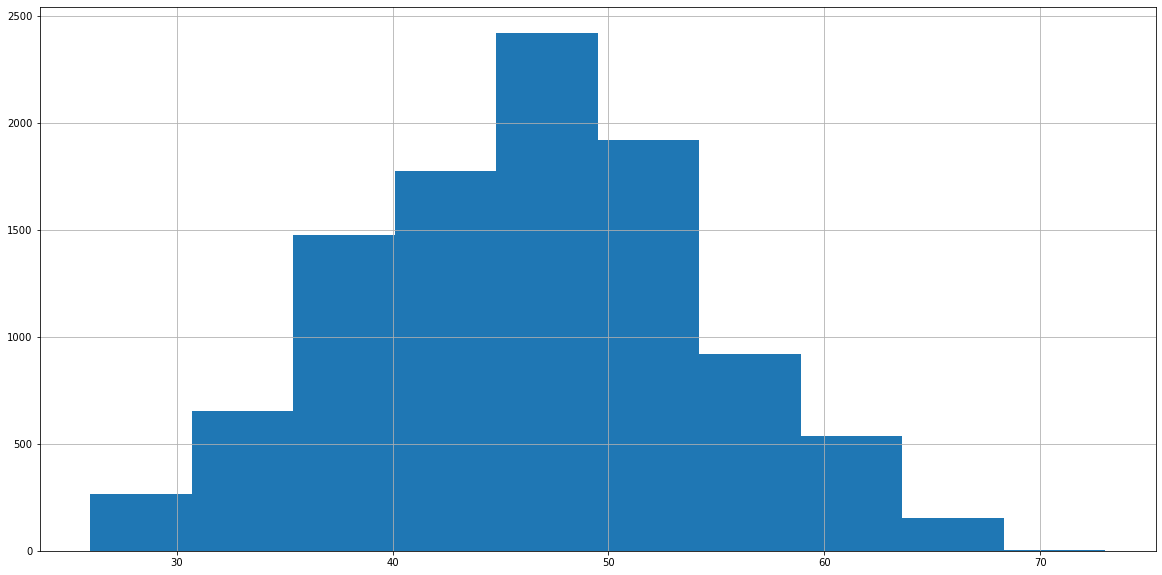

In [17]:
plt.figure(figsize=(20,10)) 
df['Customer_Age'].hist();

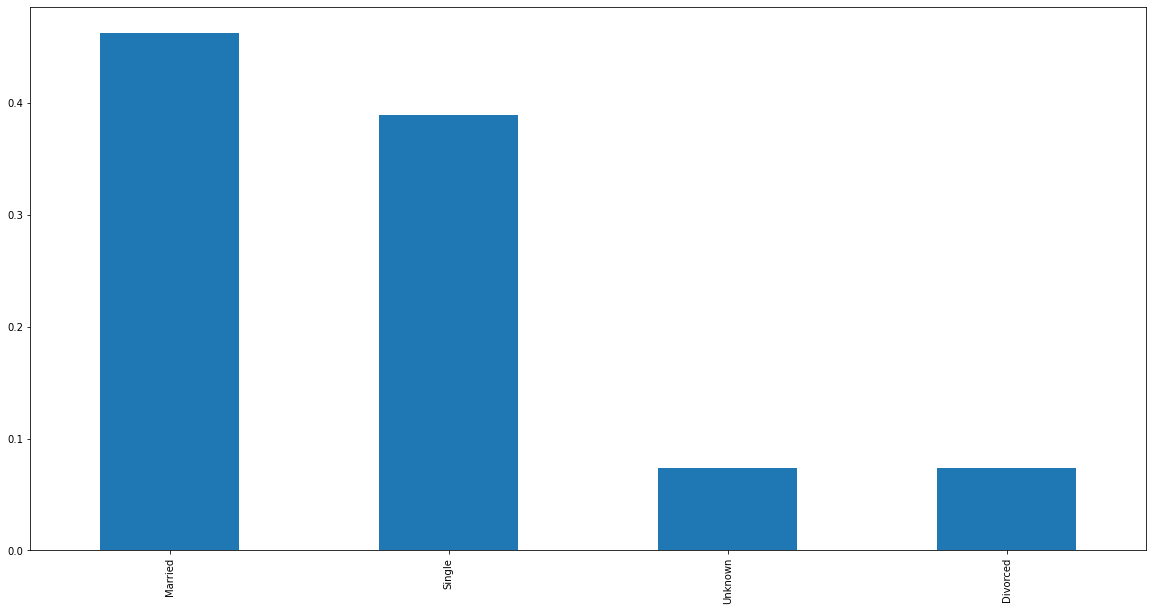

In [18]:
plt.figure(figsize=(20,10)) 
df.Marital_Status.value_counts('normalize').plot(kind='bar');

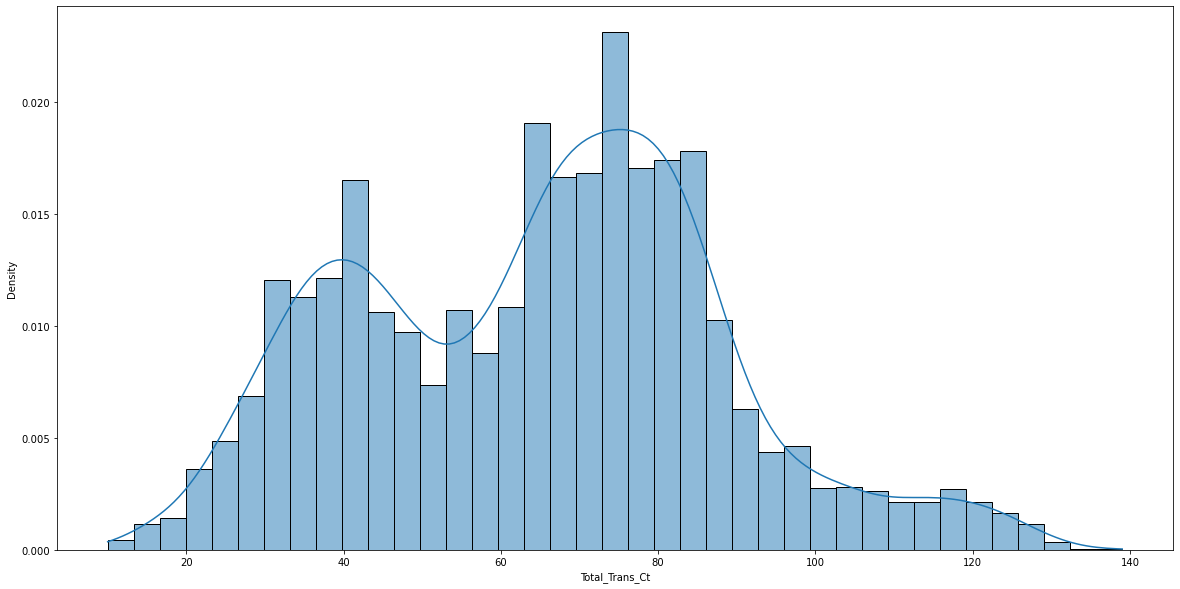

In [20]:
plt.figure(figsize=(20,10)) 
# distplot is deprecated. Use histplot instead
# sns.distplot(df['Total_Trans_Ct']);
# Show distributions of 'Total_Trans_Ct' and add a smooth curve obtained using a kernel density estimate
sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True);

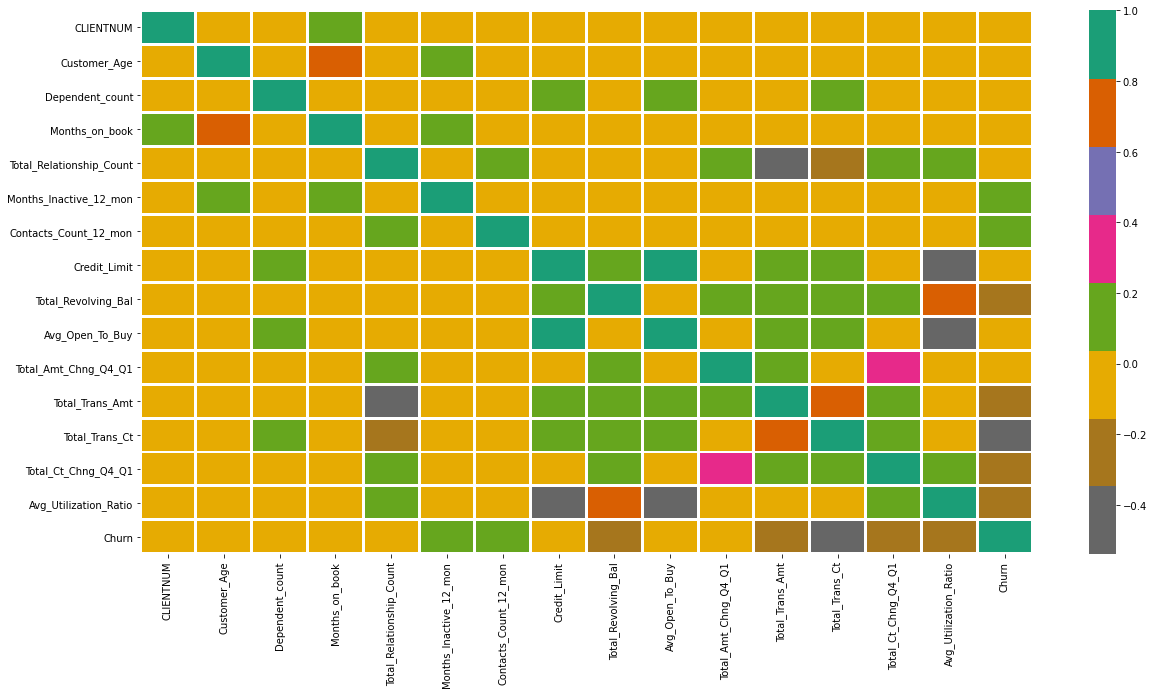

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

In [22]:
y = df['Churn']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Churn, Length: 10127, dtype: int64

In [24]:
X = pd.DataFrame()
X

""


In [30]:
df.groupby('Gender').mean()['Churn'].loc['M']

0.14615223317257287

In [28]:
df.Gender

0        M
1        F
2        M
3        F
4        M
        ..
10122    M
10123    M
10124    F
10125    M
10126    F
Name: Gender, Length: 10127, dtype: object

In [29]:
for val in df['Gender']:
    print(val)

M
F
M
F
M
M
M
M
M
M
M
M
M
M
F
M
M
M
M
F
M
F
M
F
M
F
M
M
F
M
M
M
M
F
M
F
F
F
F
F
M
M
F
M
F
M
M
M
M
M
F
F
F
M
M
F
F
M
F
M
M
M
M
M
M
M
M
F
M
M
M
F
M
M
M
M
F
F
M
M
M
M
F
F
M
M
M
F
M
M
F
M
M
M
F
M
M
M
M
M
F
F
M
F
M
F
M
M
F
M
M
M
M
F
M
M
M
M
M
F
M
F
M
F
M
M
M
M
M
F
F
M
M
M
M
F
M
M
F
F
F
M
M
F
M
F
F
M
F
M
M
M
F
M
F
F
F
M
F
F
M
F
M
F
F
F
F
F
M
M
F
F
M
M
F
F
M
F
F
F
M
M
F
M
M
F
M
F
F
F
M
M
F
M
F
F
M
M
M
M
M
M
M
M
M
F
F
M
M
M
F
M
M
M
M
M
F
M
M
F
M
F
M
F
F
M
M
F
F
M
F
M
M
M
M
M
M
M
M
M
F
M
M
F
M
M
F
M
M
M
M
M
M
M
M
F
M
M
F
M
M
F
M
F
M
F
F
F
F
M
M
M
M
M
M
F
M
F
M
F
M
M
F
F
M
M
M
F
F
F
M
F
M
M
M
M
M
F
F
M
M
M
M
M
M
M
F
M
M
F
M
M
M
F
M
F
M
F
F
M
M
M
F
M
F
M
M
F
M
F
F
F
F
F
M
M
F
M
F
M
F
M
M
M
M
M
F
M
M
F
M
F
M
F
M
M
M
M
F
M
F
M
M
F
F
M
F
F
F
M
M
M
F
F
F
F
M
M
M
F
F
M
M
M
F
M
M
M
M
F
M
F
M
F
F
M
M
M
M
M
M
M
M
M
M
M
M
M
M
F
M
M
M
F
M
M
F
M
M
M
F
M
M
M
F
M
M
M
M
F
F
F
F
F
M
F
F
F
M
M
M
F
M
M
F
M
F
F
F
M
M
M
F
F
F
M
M
F
F
M
F
M
M
M
M
M
M
F
M
M
F
F
M
M
M
F
F
M
M
M
M
F
M
F
M
F
F
M
F
M
M
M
F
F
M
M
M
M
M
F


M
M
M
F
F
F
M
F
F
F
F
F
F
F
F
F
F
F
M
M
M
F
M
F
F
M
F
F
F
F
M
M
F
F
F
F
F
F
F
F
F
M
M
F
F
F
F
M
M
F
F
F
M
F
F
F
F
F
F
F
F
M
M
F
F
M
M
F
M
F
F
F
M
F
F
M
M
F
F
M
F
M
F
M
M
F
M
F
F
M
F
F
F
F
M
M
F
F
F
F
F
F
M
M
M
M
F
F
F
M
F
M
M
F
F
F
M
F
F
F
F
F
F
F
F
F
F
F
M
F
M
F
M
M
F
F
M
F
F
F
F
F
M
F
M
F
F
M
F
F
F
F
F
F
F
F
M
F
F
M
F
F
F
F
M
M
F
F
F
F
F
M
F
M
M
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
M
F
F
M
F
F
F
F
F
F
F
F
M
F
F
F
M
M
M
F
F
F
F
M
F
F
M
F
M
M
M
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
M
F
M
F
F
M
F
F
F
M
F
F
F
F
M
F
F
F
F
F
F
F
F
F
F
F
M
F
M
F
F
F
F
F
F
M
F
F
F
F
F
F
F
F
M
M
F
M
F
M
F
F
F
M
F
F
F
F
M
F
F
F
F
F
F
F
F
F
F
F
F
M
F
M
F
M
M
M
M
F
F
F
M
M
F
M
F
F
F
F
M
F
F
M
F
F
F
F
F
F
F
F
F
F
F
M
F
F
F
M
F
M
F
M
M
F
M
F
M
F
F
M
F
M
M
M
F
F
M
F
M
F
M
F
M
F
F
F
F
M
F
M
F
F
F
F
M
F
F
F
M
F
F
M
M
M
M
M
F
F
M
M
F
F
F
F
F
F
M
F
F
F
F
F
M
F
M
F
M
F
M
F
F
F
F
F
F
F
F
F
M
F
F
M
F
F
F
F
F
F
M
F
F
F
F
F
M
F
F
F
M
M
M
F
F
M
M
F
F
M
F
M
M
M
F
F
F
F
M
F
M
F
M
F
M
M
F
M
M
F
F
F
F
M
M
F
F
F
M
M
F
F
M
M
F
F


In [31]:
# gender encoded column
gender_lst = []
gender_groups = df.groupby('Gender').mean()['Churn']

for val in df['Gender']:
    gender_lst.append(gender_groups.loc[val])

df['Gender_Churn'] = gender_lst    
#education encoded column
edu_lst = []
edu_groups = df.groupby('Education_Level').mean()['Churn']

for val in df['Education_Level']:
    edu_lst.append(edu_groups.loc[val])

df['Education_Level_Churn'] = edu_lst

#marital encoded column
marital_lst = []
marital_groups = df.groupby('Marital_Status').mean()['Churn']

for val in df['Marital_Status']:
    marital_lst.append(marital_groups.loc[val])

df['Marital_Status_Churn'] = marital_lst

#income encoded column
income_lst = []
income_groups = df.groupby('Income_Category').mean()['Churn']

for val in df['Income_Category']:
    income_lst.append(income_groups.loc[val])

df['Income_Category_Churn'] = income_lst

#card encoded column
card_lst = []
card_groups = df.groupby('Card_Category').mean()['Churn']
 
for val in df['Card_Category']:
    card_lst.append(card_groups.loc[val])

df['Card_Category_Churn'] = card_lst
    
    

In [32]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,0,0.146152,0.152012,0.151269,0.134807,0.160979
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1291,33,3.714,0.105,0,0.173572,0.155691,0.169414,0.171862,0.160979
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,0,0.146152,0.155691,0.151269,0.157655,0.160979
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1171,20,2.333,0.760,0,0.173572,0.152012,0.172230,0.171862,0.160979
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,816,28,2.500,0.000,0,0.146152,0.159381,0.151269,0.134807,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,15476,117,0.857,0.462,0,0.146152,0.155691,0.169414,0.151397,0.160979
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,8764,69,0.683,0.511,1,0.146152,0.168532,0.161765,0.151397,0.160979
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,10291,60,0.818,0.000,1,0.173572,0.152012,0.151269,0.171862,0.160979
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,8395,62,0.722,0.000,1,0.146152,0.155691,0.172230,0.151397,0.160979


In [33]:
y = df['Churn']

In [34]:
X = pd.DataFrame()

In [36]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
             'Income_Category_Churn', 'Card_Category_Churn']

X[keep_cols] = df[keep_cols]
X

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.146152,0.155691,0.169414,0.151397,0.160979
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.146152,0.168532,0.161765,0.151397,0.160979
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.173572,0.152012,0.151269,0.171862,0.160979
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.146152,0.155691,0.172230,0.151397,0.160979
